<a href="https://colab.research.google.com/github/ashishbhatta/Energy_Arbitrage/blob/main/IEX_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

# GitHub API endpoint for your folder
api_url = "https://api.github.com/repos/ashishbhatta/Energy_Arbitrage/contents/IEX%20Data"

r = requests.get(api_url)
r.raise_for_status()
files = r.json()

raw_links = []

for file in files:
    if file["name"].endswith(".xlsx"):   # only Excel files
        raw_links.append(file["download_url"])

print("Raw Excel file links:")
for l in raw_links:
    print(l)

Raw Excel file links:
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202023.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202024.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/April%202025.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202023.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202024.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/August%202025.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/December%202022.xlsx
https://raw.githubusercontent.com/ashishbhatta/Energy_Arbitrage/main/IEX%20Data/December%

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(columns = ["Date",
                               "Hour",
                               "Session ID",
                               "Time Block",
                               "Purchase Bid (MW)",
                               "Sell Bid (MW)",
                               "MCV (MW)",
                               "Final Scheduled Volume (MW)",
                               "MCP (Rs/MWh) *"])
data

Empty DataFrame
Columns: [Date, Hour, Session ID, Time Block, Purchase Bid (MW), Sell Bid (MW), MCV (MW), Final Scheduled Volume (MW), MCP (Rs/MWh) *]
Index: []

In [ ]:
data = data.set_index("Date")
data

Empty DataFrame
Columns: [Hour, Session ID, Time Block, Purchase Bid (MW), Sell Bid (MW), MCV (MW), Final Scheduled Volume (MW), MCP (Rs/MWh) *]
Index: []

In [ ]:
df = pd.read_excel('https://github.com/ashishbhatta/Energy_Arbitrage/raw/refs/heads/main/IEX%20Data/April%202022.xlsx',skiprows=4,header = 0,index_col=0)

In [ ]:
df

Hour Session ID   Time Block Purchase Bid (MW)  \
Date                                                                
01-04-2022            1          1  00:00-00:15           6912.20   
01-04-2022            1          1  00:15-00:30           6741.60   
01-04-2022            1          2  00:30-00:45           6849.20   
01-04-2022            1          2  00:45-01:00           6558.30   
01-04-2022            2          3  01:00-01:15           6295.20   
...                 ...        ...          ...               ...   
29-04-2022     Avg (MW)   25678.97      1528.48           1528.48   
30-04-2022  Total (MWh)  392763.90    100030.25          98972.73   
30-04-2022     Max (MW)   31160.60      8057.40           7881.41   
30-04-2022     Min (MW)    7389.00      1785.30           1785.30   
30-04-2022     Avg (MW)   16365.16      4167.93           4123.86   

           Sell Bid (MW)  MCV (MW)  Final Scheduled Volume (MW)  \
Date                                                              
01-04-2022       2796.90   1892.90                      1892.90   
01-04-2022       2870.40   1966.40                      1966.40   
01-04-2022       2663.60   2099.60                      2099.60   
01-04-2022       2718.50   2104.50                      2104.50   
01-04-2022       2517.90   2157.47                      2157.47   
...                  ...       ...                          ...   
29-04-2022       1528.48  12000.00                          NaN   
30-04-2022      98972.73       NaN                          NaN   
30-04-2022       7881.41  12000.00                          NaN   
30-04-2022       1785.30   7400.42                          NaN   
30-04-2022       4123.86  11672.53                          NaN   

            MCP (Rs/MWh) *  
Date                        
01-04-2022        16744.25  
01-04-2022        16000.58  
01-04-2022        16689.62  
01-04-2022        16000.12  
01-04-2022        14998.50  
...                    ...  
29-04-2022             NaN  
30-04-2022             NaN  
30-04-2022             NaN  
30-04-2022             NaN  
30-04-2022             NaN  

[3001 rows x 8 columns]

In [ ]:
df_cleaned = df.dropna(subset=[df.columns[6], df.columns[7]])

In [ ]:
df_cleaned.tail()

Hour Session ID   Time Block Purchase Bid (MW) Sell Bid (MW)  \
Date                                                                      
30-04-2022   23         46  22:45-23:00          17018.90       4397.40   
30-04-2022   24         47  23:00-23:15          17327.70       4434.40   
30-04-2022   24         47  23:15-23:30          17189.90       4247.40   
30-04-2022   24         48  23:30-23:45          17586.90       4290.40   
30-04-2022   24         48  23:45-24:00          17313.10       4294.80   

           MCV (MW)  Final Scheduled Volume (MW)  MCP (Rs/MWh) *  
Date                                                              
30-04-2022  4397.40                       4397.4         12000.0  
30-04-2022  4434.40                       4434.4         12000.0  
30-04-2022  4247.40                       4247.4         12000.0  
30-04-2022  4290.40                       4290.4         12000.0  
30-04-2022  4294.80                       4294.8         12000.0

In [ ]:
df_cleaned.head()

Hour Session ID   Time Block Purchase Bid (MW) Sell Bid (MW)  \
Date                                                                      
01-04-2022    1          1  00:00-00:15           6912.20       2796.90   
01-04-2022    1          1  00:15-00:30           6741.60       2870.40   
01-04-2022    1          2  00:30-00:45           6849.20       2663.60   
01-04-2022    1          2  00:45-01:00           6558.30       2718.50   
01-04-2022    2          3  01:00-01:15           6295.20       2517.90   

           MCV (MW)  Final Scheduled Volume (MW)  MCP (Rs/MWh) *  
Date                                                              
01-04-2022  1892.90                      1892.90        16744.25  
01-04-2022  1966.40                      1966.40        16000.58  
01-04-2022  2099.60                      2099.60        16689.62  
01-04-2022  2104.50                      2104.50        16000.12  
01-04-2022  2157.47                      2157.47        14998.50

In [ ]:
frames = [data,df_cleaned]

In [ ]:
results = pd.concat(frames)

/tmp/ipython-input-4107715972.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat(frames)


In [ ]:
results.head()

Hour Session ID   Time Block Purchase Bid (MW) Sell Bid (MW)  \
Date                                                                      
01-04-2022    1          1  00:00-00:15           6912.20       2796.90   
01-04-2022    1          1  00:15-00:30           6741.60       2870.40   
01-04-2022    1          2  00:30-00:45           6849.20       2663.60   
01-04-2022    1          2  00:45-01:00           6558.30       2718.50   
01-04-2022    2          3  01:00-01:15           6295.20       2517.90   

           MCV (MW)  Final Scheduled Volume (MW)  MCP (Rs/MWh) *  
Date                                                              
01-04-2022  1892.90                      1892.90        16744.25  
01-04-2022  1966.40                      1966.40        16000.58  
01-04-2022  2099.60                      2099.60        16689.62  
01-04-2022  2104.50                      2104.50        16000.12  
01-04-2022  2157.47                      2157.47        14998.50

In [ ]:
results["Start_Time"] = results["Time Block"].str.split("-").str[0]

# Make proper datetime
results["DateTime"] = pd.to_datetime(results.index.astype(str) + " " + results["Start_Time"], format="%d-%m-%Y %H:%M")

In [ ]:
results

Hour Session ID   Time Block Purchase Bid (MW) Sell Bid (MW)  \
Date                                                                      
01-04-2022    1          1  00:00-00:15           6912.20       2796.90   
01-04-2022    1          1  00:15-00:30           6741.60       2870.40   
01-04-2022    1          2  00:30-00:45           6849.20       2663.60   
01-04-2022    1          2  00:45-01:00           6558.30       2718.50   
01-04-2022    2          3  01:00-01:15           6295.20       2517.90   
...         ...        ...          ...               ...           ...   
30-04-2022   23         46  22:45-23:00          17018.90       4397.40   
30-04-2022   24         47  23:00-23:15          17327.70       4434.40   
30-04-2022   24         47  23:15-23:30          17189.90       4247.40   
30-04-2022   24         48  23:30-23:45          17586.90       4290.40   
30-04-2022   24         48  23:45-24:00          17313.10       4294.80   

           MCV (MW)  Final Scheduled Volume (MW)  MCP (Rs/MWh) * Start_Time  \
Date                                                                          
01-04-2022  1892.90                      1892.90        16744.25      00:00   
01-04-2022  1966.40                      1966.40        16000.58      00:15   
01-04-2022  2099.60                      2099.60        16689.62      00:30   
01-04-2022  2104.50                      2104.50        16000.12      00:45   
01-04-2022  2157.47                      2157.47        14998.50      01:00   
...             ...                          ...             ...        ...   
30-04-2022  4397.40                      4397.40        12000.00      22:45   
30-04-2022  4434.40                      4434.40        12000.00      23:00   
30-04-2022  4247.40                      4247.40        12000.00      23:15   
30-04-2022  4290.40                      4290.40        12000.00      23:30   
30-04-2022  4294.80                      4294.80        12000.00      23:45   

                      DateTime  
Date                            
01-04-2022 2022-04-01 00:00:00  
01-04-2022 2022-04-01 00:15:00  
01-04-2022 2022-04-01 00:30:00  
01-04-2022 2022-04-01 00:45:00  
01-04-2022 2022-04-01 01:00:00  
...                        ...  
30-04-2022 2022-04-30 22:45:00  
30-04-2022 2022-04-30 23:00:00  
30-04-2022 2022-04-30 23:15:00  
30-04-2022 2022-04-30 23:30:00  
30-04-2022 2022-04-30 23:45:00  

[2880 rows x 10 columns]

In [ ]:
results = results.set_index("DateTime")
results

Hour Session ID   Time Block Purchase Bid (MW)  \
DateTime                                                             
2022-04-01 00:00:00    1          1  00:00-00:15           6912.20   
2022-04-01 00:15:00    1          1  00:15-00:30           6741.60   
2022-04-01 00:30:00    1          2  00:30-00:45           6849.20   
2022-04-01 00:45:00    1          2  00:45-01:00           6558.30   
2022-04-01 01:00:00    2          3  01:00-01:15           6295.20   
...                  ...        ...          ...               ...   
2022-04-30 22:45:00   23         46  22:45-23:00          17018.90   
2022-04-30 23:00:00   24         47  23:00-23:15          17327.70   
2022-04-30 23:15:00   24         47  23:15-23:30          17189.90   
2022-04-30 23:30:00   24         48  23:30-23:45          17586.90   
2022-04-30 23:45:00   24         48  23:45-24:00          17313.10   

                    Sell Bid (MW) MCV (MW)  Final Scheduled Volume (MW)  \
DateTime                                                                  
2022-04-01 00:00:00       2796.90  1892.90                      1892.90   
2022-04-01 00:15:00       2870.40  1966.40                      1966.40   
2022-04-01 00:30:00       2663.60  2099.60                      2099.60   
2022-04-01 00:45:00       2718.50  2104.50                      2104.50   
2022-04-01 01:00:00       2517.90  2157.47                      2157.47   
...                           ...      ...                          ...   
2022-04-30 22:45:00       4397.40  4397.40                      4397.40   
2022-04-30 23:00:00       4434.40  4434.40                      4434.40   
2022-04-30 23:15:00       4247.40  4247.40                      4247.40   
2022-04-30 23:30:00       4290.40  4290.40                      4290.40   
2022-04-30 23:45:00       4294.80  4294.80                      4294.80   

                     MCP (Rs/MWh) * Start_Time  
DateTime                                        
2022-04-01 00:00:00        16744.25      00:00  
2022-04-01 00:15:00        16000.58      00:15  
2022-04-01 00:30:00        16689.62      00:30  
2022-04-01 00:45:00        16000.12      00:45  
2022-04-01 01:00:00        14998.50      01:00  
...                             ...        ...  
2022-04-30 22:45:00        12000.00      22:45  
2022-04-30 23:00:00        12000.00      23:00  
2022-04-30 23:15:00        12000.00      23:15  
2022-04-30 23:30:00        12000.00      23:30  
2022-04-30 23:45:00        12000.00      23:45  

[2880 rows x 9 columns]

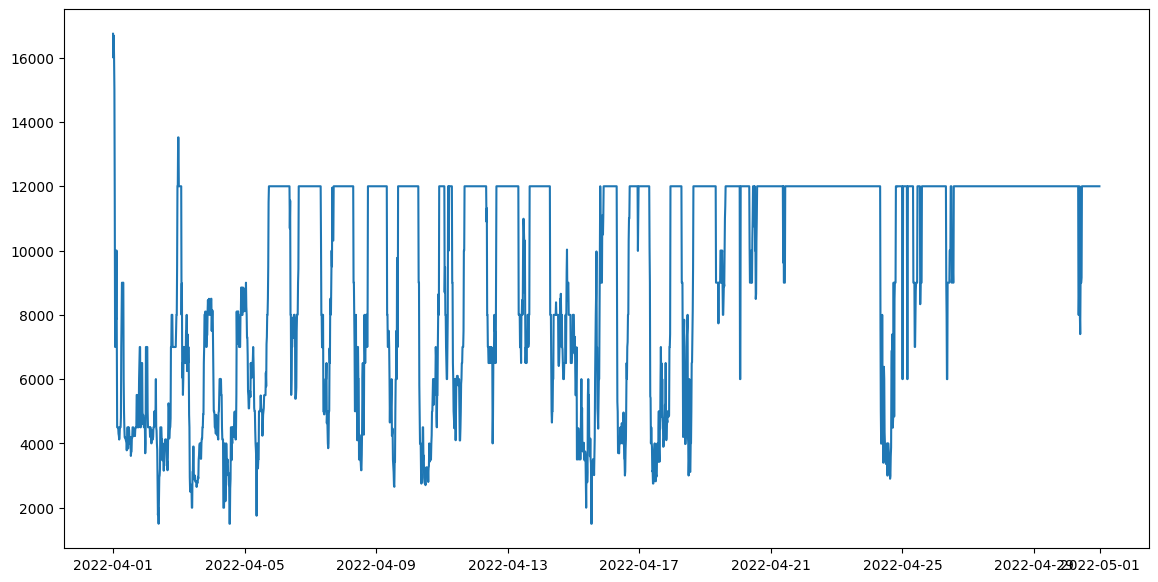

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))  # Bigger figure
plt.plot(results["MCP (Rs/MWh) *"])
plt.show()

In [ ]:
  import matplotlib.pyplot as plt

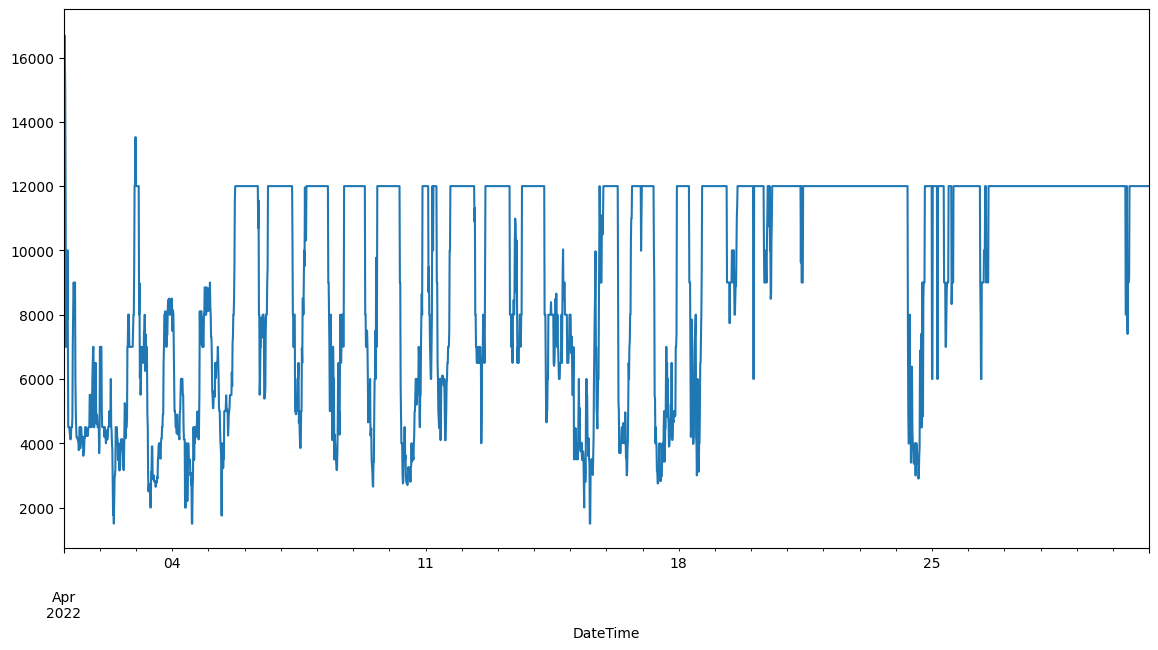

In [ ]:
plt.figure(figsize=(14,7))  # Bigger figure
results["MCP (Rs/MWh) *"].plot(kind="line")
plt.show()

In [ ]:
import requests
import pandas as pd

# GitHub API endpoint for your folder
api_url = "https://api.github.com/repos/ashishbhatta/Energy_Arbitrage/contents/IEX%20Data"

# Get folder contents
r = requests.get(api_url)
r.raise_for_status()
files = r.json()

# Collect Excel file download links
raw_links = [file["download_url"] for file in files if file["name"].endswith(".xlsx")]

all_dfs = []  # list to collect cleaned DataFrames

for link in raw_links:
    try:
        # Read Excel with same skiprows, header, index settings
        df = pd.read_excel(link, skiprows=4, header=0, index_col=0)

        # Drop rows where 7th or 8th column is NaN
        df_cleaned = df.dropna(subset=[df.columns[6], df.columns[7]])

        # Add a column with file name (so you know the source)
        df_cleaned["Source_File"] = link.split("/")[-1]

        # Append to list
        all_dfs.append(df_cleaned)

        print(f"✅ Processed: {link.split('/')[-1]}, shape = {df_cleaned.shape}")

    except Exception as e:
        print(f"❌ Failed for {link}: {e}")

# Combine all into one DataFrame
final_df = pd.concat(all_dfs, ignore_index=False)

print("\n📊 Final DataFrame shape:", final_df.shape)

/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: April%202022.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: April%202023.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: April%202024.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: April%202025.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: August%202022.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: August%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: August%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: August%202025.xlsx, shape = (2494, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: December%202022.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: December%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: December%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: February%202023.xlsx, shape = (2688, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: February%202024.xlsx, shape = (2784, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: Feburay%202025.xlsx, shape = (2688, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: January%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: January%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: January%202025.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: July%202022.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: July%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: July%202024.xlsx, shape = (2974, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: July%202025.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: June%202022.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: June%202023.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: June%202024.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: June%202025.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: March%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: March%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: March%202025.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: May%202022.xlsx, shape = (2230, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: May%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: May%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: May%202025.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: November%202022.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: November%202023.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: November%202024.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: October%202022.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: October%202023.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: October%202024.xlsx, shape = (2976, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: September%202022.xlsx, shape = (2880, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


✅ Processed: September%202023.xlsx, shape = (2880, 9)
✅ Processed: September%202024.xlsx, shape = (2880, 9)

📊 Final DataFrame shape: (118674, 9)


/tmp/ipython-input-207560529.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Source_File"] = link.split("/")[-1]


In [ ]:
final_df["Start_Time"] = final_df["Time Block"].str.split("-").str[0]

# Make proper datetime
final_df["DateTime"] = pd.to_datetime(final_df.index.astype(str) + " " + final_df["Start_Time"], format="%d-%m-%Y %H:%M")

In [ ]:
final_df = final_df.set_index("DateTime")
final_df = final_df.sort_index()
final_df

Hour Session ID   Time Block Purchase Bid (MW)  \
DateTime                                                             
2022-04-01 00:00:00    1          1  00:00-00:15           6912.20   
2022-04-01 00:15:00    1          1  00:15-00:30           6741.60   
2022-04-01 00:30:00    1          2  00:30-00:45           6849.20   
2022-04-01 00:45:00    1          2  00:45-01:00           6558.30   
2022-04-01 01:00:00    2          3  01:00-01:15           6295.20   
...                  ...        ...          ...               ...   
2025-08-26 22:15:00   23         45  22:15-22:30           9826.10   
2025-08-26 22:30:00   23         46  22:30-22:45           9908.30   
2025-08-26 22:45:00   23         46  22:45-23:00          10335.30   
2025-08-26 23:00:00   24         47  23:00-23:15           9671.10   
2025-08-26 23:15:00   24         47  23:15-23:30           9619.60   

                    Sell Bid (MW) MCV (MW)  Final Scheduled Volume (MW)  \
DateTime                                                                  
2022-04-01 00:00:00       2796.90  1892.90                      1892.90   
2022-04-01 00:15:00       2870.40  1966.40                      1966.40   
2022-04-01 00:30:00       2663.60  2099.60                      2099.60   
2022-04-01 00:45:00       2718.50  2104.50                      2104.50   
2022-04-01 01:00:00       2517.90  2157.47                      2157.47   
...                           ...      ...                          ...   
2025-08-26 22:15:00       9104.50  8088.50                      8088.50   
2025-08-26 22:30:00       8378.40  7484.40                      7484.40   
2025-08-26 22:45:00       8507.80  7773.39                      7773.39   
2025-08-26 23:00:00       9376.10  7875.32                      7875.32   
2025-08-26 23:15:00       9682.50  8064.22                      8064.22   

                     MCP (Rs/MWh) *         Source_File Start_Time  
DateTime                                                            
2022-04-01 00:00:00        16744.25   April%202022.xlsx      00:00  
2022-04-01 00:15:00        16000.58   April%202022.xlsx      00:15  
2022-04-01 00:30:00        16689.62   April%202022.xlsx      00:30  
2022-04-01 00:45:00        16000.12   April%202022.xlsx      00:45  
2022-04-01 01:00:00        14998.50   April%202022.xlsx      01:00  
...                             ...                 ...        ...  
2025-08-26 22:15:00         4070.00  August%202025.xlsx      22:15  
2025-08-26 22:30:00         4510.91  August%202025.xlsx      22:30  
2025-08-26 22:45:00         4850.49  August%202025.xlsx      22:45  
2025-08-26 23:00:00         3960.94  August%202025.xlsx      23:00  
2025-08-26 23:15:00         3799.43  August%202025.xlsx      23:15  

[118674 rows x 10 columns]

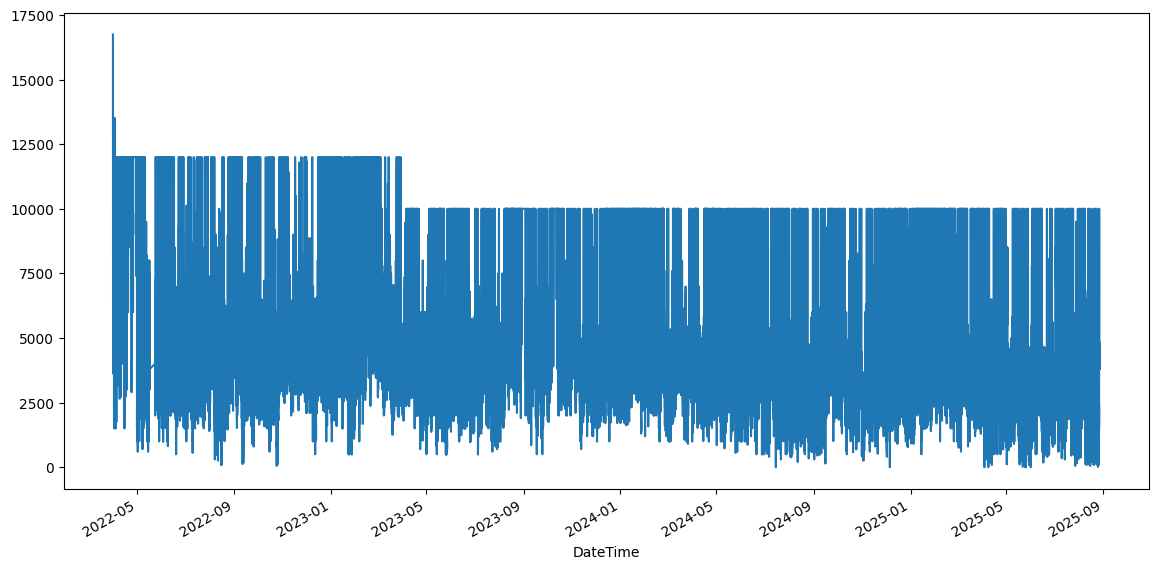

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))  # Bigger figure
final_df["MCP (Rs/MWh) *"].plot(kind="line")
plt.show()

In [ ]:
final_df.to_csv("final_df.csv")

In [ ]:
import plotly.express as px

fig = px.line(
    final_df.reset_index(),
    x="DateTime",
    y="MCP (Rs/MWh) *",
    title="Market Clearing Price (15-min intervals)",
    labels={"MCP (Rs/MWh) *": "MCP (Rs/MWh)", "DateTime": "Time"},
    markers=True
)

fig.show()

In [ ]:
fig.write_html("MCP_plot.html")

print("Interactive plot saved as MCP_plot.html")

Interactive plot saved as MCP_plot.html


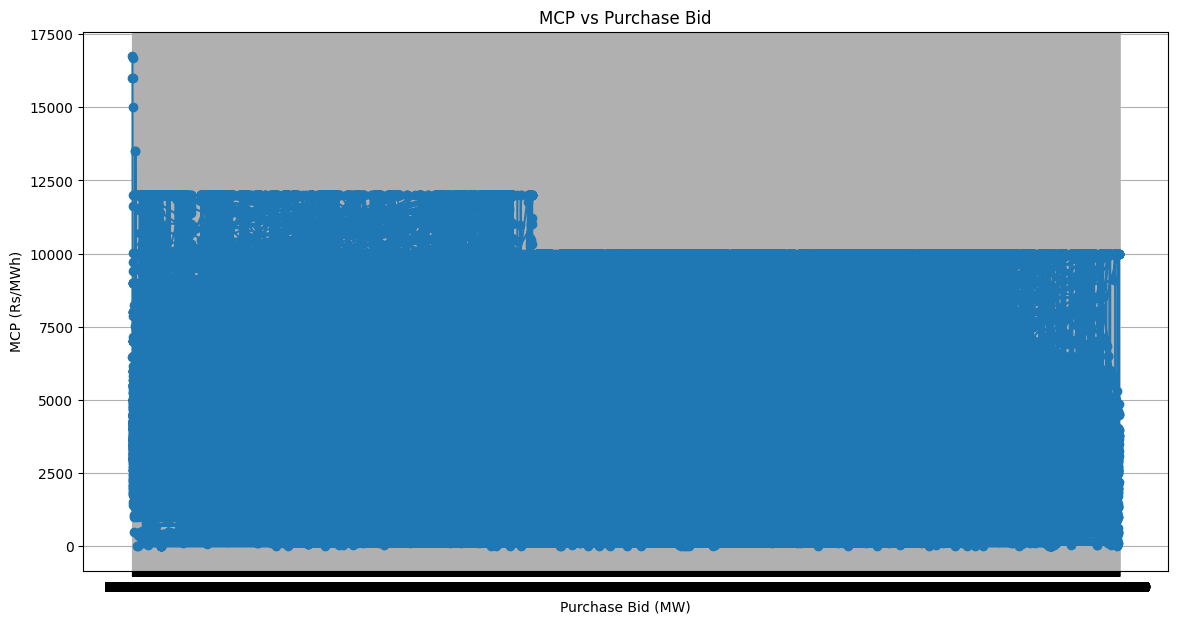

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

plt.plot(final_df["Purchase Bid (MW)"],
         final_df["MCP (Rs/MWh) *"],
         marker='o', linestyle='-')

plt.xlabel("Purchase Bid (MW)")
plt.ylabel("MCP (Rs/MWh)")
plt.title("MCP vs Purchase Bid")
plt.grid(True)
plt.show()


In [ ]:
# Define and sort final_df
final_df = final_df.set_index("DateTime")
final_df = final_df.sort_index()

# Plot the data
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

plt.plot(final_df["Purchase Bid (MW)"],
         final_df["MCP (Rs/MWh) *"],
         marker='o', linestyle='-')

plt.xlabel("Purchase Bid (MW)")
plt.ylabel("MCP (Rs/MWh)")
plt.title("MCP vs Purchase Bid")
plt.grid(True)
plt.show()

In [ ]:
final_df.to_csv("final_df.csv")

In [ ]:
final_df

Hour Session ID   Time Block Purchase Bid (MW)  \
DateTime                                                             
2022-04-01 00:00:00    1          1  00:00-00:15           6912.20   
2022-04-01 00:15:00    1          1  00:15-00:30           6741.60   
2022-04-01 00:30:00    1          2  00:30-00:45           6849.20   
2022-04-01 00:45:00    1          2  00:45-01:00           6558.30   
2022-04-01 01:00:00    2          3  01:00-01:15           6295.20   
...                  ...        ...          ...               ...   
2025-08-26 22:15:00   23         45  22:15-22:30           9826.10   
2025-08-26 22:30:00   23         46  22:30-22:45           9908.30   
2025-08-26 22:45:00   23         46  22:45-23:00          10335.30   
2025-08-26 23:00:00   24         47  23:00-23:15           9671.10   
2025-08-26 23:15:00   24         47  23:15-23:30           9619.60   

                    Sell Bid (MW) MCV (MW)  Final Scheduled Volume (MW)  \
DateTime                                                                  
2022-04-01 00:00:00       2796.90  1892.90                      1892.90   
2022-04-01 00:15:00       2870.40  1966.40                      1966.40   
2022-04-01 00:30:00       2663.60  2099.60                      2099.60   
2022-04-01 00:45:00       2718.50  2104.50                      2104.50   
2022-04-01 01:00:00       2517.90  2157.47                      2157.47   
...                           ...      ...                          ...   
2025-08-26 22:15:00       9104.50  8088.50                      8088.50   
2025-08-26 22:30:00       8378.40  7484.40                      7484.40   
2025-08-26 22:45:00       8507.80  7773.39                      7773.39   
2025-08-26 23:00:00       9376.10  7875.32                      7875.32   
2025-08-26 23:15:00       9682.50  8064.22                      8064.22   

                     MCP (Rs/MWh) *         Source_File Start_Time  
DateTime                                                            
2022-04-01 00:00:00        16744.25   April%202022.xlsx      00:00  
2022-04-01 00:15:00        16000.58   April%202022.xlsx      00:15  
2022-04-01 00:30:00        16689.62   April%202022.xlsx      00:30  
2022-04-01 00:45:00        16000.12   April%202022.xlsx      00:45  
2022-04-01 01:00:00        14998.50   April%202022.xlsx      01:00  
...                             ...                 ...        ...  
2025-08-26 22:15:00         4070.00  August%202025.xlsx      22:15  
2025-08-26 22:30:00         4510.91  August%202025.xlsx      22:30  
2025-08-26 22:45:00         4850.49  August%202025.xlsx      22:45  
2025-08-26 23:00:00         3960.94  August%202025.xlsx      23:00  
2025-08-26 23:15:00         3799.43  August%202025.xlsx      23:15  

[118674 rows x 10 columns]

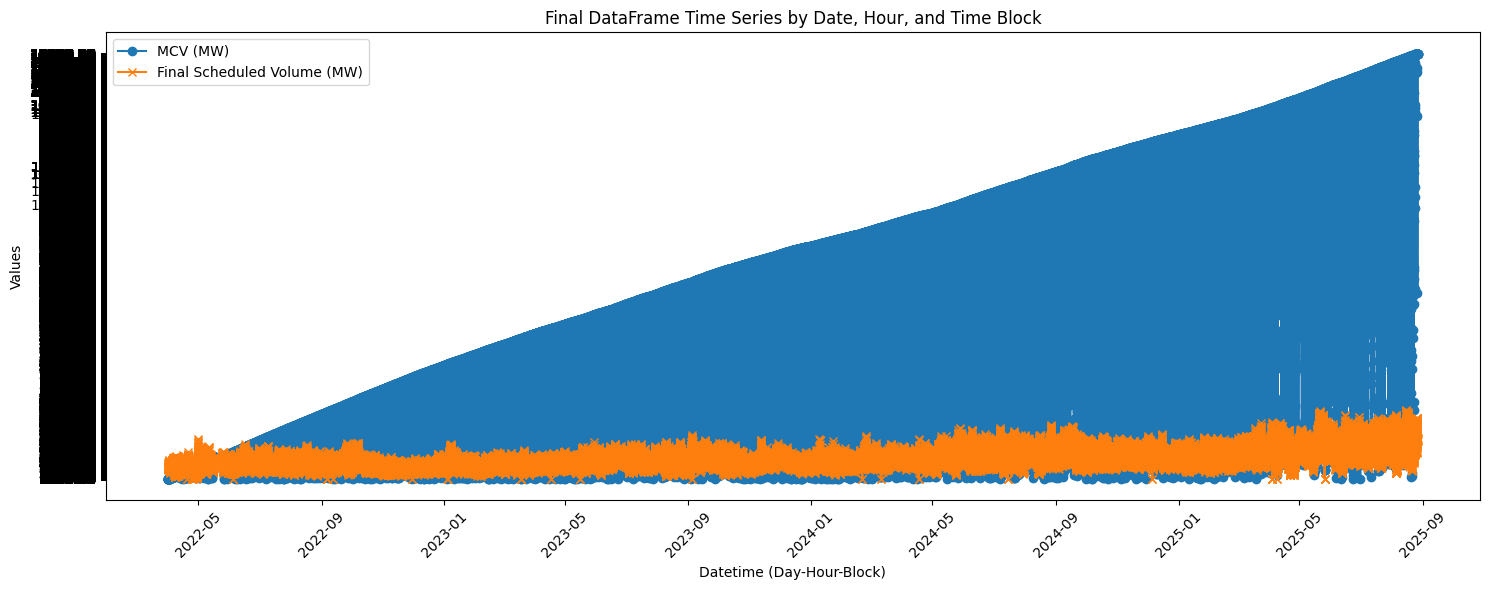

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset index → datetime column will be in the first column
df_reset = final_df.reset_index()

# Get the first column name dynamically
datetime_col = df_reset.columns[0]

# Convert to datetime
df_reset[datetime_col] = pd.to_datetime(df_reset[datetime_col], dayfirst=True, errors="coerce")

# Create Date, Hour, and Time_Block
df_reset["Date"] = df_reset[datetime_col].dt.date
df_reset["Hour"] = df_reset[datetime_col].dt.hour
df_reset["Time_Block"] = (df_reset[datetime_col].dt.minute // 15) + 1   # 15-min blocks (1–4)

# Use this as proper datetime for x-axis
df_reset["Datetime"] = df_reset[datetime_col]

# Sort chronologically
df_reset = df_reset.sort_values("Datetime")

# Plot your main two columns (6th and 7th data columns)
plt.figure(figsize=(15,6))
plt.plot(df_reset["Datetime"], df_reset[df_reset.columns[6]], label=df_reset.columns[6], marker="o")
plt.plot(df_reset["Datetime"], df_reset[df_reset.columns[7]], label=df_reset.columns[7], marker="x")

plt.xlabel("Datetime (Day-Hour-Block)")
plt.ylabel("Values")
plt.title("Final DataFrame Time Series by Date, Hour, and Time Block")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print(final_df.head())
print(final_df.index.name)
print(final_df.index[:5])


                    Hour Session ID   Time Block Purchase Bid (MW)  \
DateTime                                                             
2022-04-01 00:00:00    1          1  00:00-00:15           6912.20   
2022-04-01 00:15:00    1          1  00:15-00:30           6741.60   
2022-04-01 00:30:00    1          2  00:30-00:45           6849.20   
2022-04-01 00:45:00    1          2  00:45-01:00           6558.30   
2022-04-01 01:00:00    2          3  01:00-01:15           6295.20   

                    Sell Bid (MW) MCV (MW)  Final Scheduled Volume (MW)  \
DateTime                                                                  
2022-04-01 00:00:00       2796.90  1892.90                      1892.90   
2022-04-01 00:15:00       2870.40  1966.40                      1966.40   
2022-04-01 00:30:00       2663.60  2099.60                      2099.60   
2022-04-01 00:45:00       2718.50  2104.50                      2104.50   
2022-04-01 01:00:00       2517.90  2157.47                 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Reset index
df_reset = final_df.reset_index()

# Convert Date column once
df_reset["Date"] = pd.to_datetime(df_reset["Date"], dayfirst=True)

# Extract hour and minute from Time Block
# Hour in dataframe is 1-based, so subtract 1
df_reset["Hour_TD"] = pd.to_timedelta(df_reset["Hour"] - 1, unit="h")

# Minute from Time Block start (first 2 chars of HH:MM)
df_reset["Minute_TD"] = pd.to_timedelta(df_reset["Time Block"].str.slice(0,2).astype(int), unit="h") \
                        + pd.to_timedelta(df_reset["Time Block"].str.slice(3,5).astype(int), unit="m")

# Build Datetime column
df_reset["Datetime"] = df_reset["Date"] + df_reset["Hour_TD"] + df_reset["Minute_TD"]

# Sort
df_reset = df_reset.sort_values("Datetime")

# Plot without markers for speed
plt.figure(figsize=(15,6))
plt.plot(df_reset["Datetime"], df_reset["Purchase Bid (MW)"], label="Purchase Bid")
plt.plot(df_reset["Datetime"], df_reset["Sell Bid (MW)"], label="Sell Bid")

plt.xlabel("Datetime (Day-Hour-Block)")
plt.ylabel("MW")
plt.title("Purchase vs Sell Bids across Time Blocks")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Date'